In [24]:
#export
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
import skimage.color as color
from imageio import imread
from sklearn.cluster import MeanShift

In [25]:
#export
def binReduction(im, votes, radius):
    w, h = np.shape(votes)

    out = np.zeros(shape=(w,h))

    for i in range(0, w, 10):
        for j in range(0, h, 10):
            try:
                subMatrix = votes[i-5:i+5, j-5:j+5]
                out[i,j] = np.sum(subMatrix)
            except:
                pass
    plt.title('Bin Reduction')
    plt.imshow(out)
#     plt.show()

    # FIND AND DRAW CIRCLES
    centers = list()
    for i in range(w):
        for j in range(h):
            if out[i, j] >= 50:
                    centers.append((j, i))


    drawCircles(im, centers, radius)

In [26]:

def detectCircles(im, radius, useGradient, sig=2):
    img = color.rgb2gray(im)
    w, h = np.shape(img)

    edges = feature.canny(img, sigma=sig)
    ds = np.gradient(img)
    gradients = np.arctan2(-ds[1], ds[0])

    votes = np.zeros(shape=(w, h))
    for i in range(w):
        for j in range(h):
            if edges[i, j]:
                if useGradient:
                    theta = gradients[i, j]
                    theta2 = theta + np.pi
                    a = i - radius * np.cos(-theta)
                    b = j - radius * np.sin(-theta)
                    aInv = i - radius * np.cos(theta2)
                    bInv = j - radius * np.sin(theta2)
                    try:
                        votes[int(a), int(b)] += 1
                        votes[int(aInv), int(bInv)] += 1

                    except:
                        pass

                else:
                    for theta in np.radians(range(360)):
                        a = i - radius * np.cos(theta)
                        b = j - radius * np.sin(theta)
                        try:
                            votes[int(a), int(b)] += 1
                        except:
                            pass

    # MEAN SHIFT EXPERIMENTATION
    ######################################
    # points = list()
    # for i in range(w):
    #     for j in range(h):
    #         points = points + [(i, j)] * int(votes[i, j])
    # meanShift = MeanShift()
    # meanShift.fit(points)
    # modes = meanShift.cluster_centers_
    # print('num circles: ' + str(len(modes)))
    # drawCircles(im, modes, radius)
    #######################################

    # BIN REDUCTION
    ########################
    binReduction(im, votes, radius)

    plt.title("Accumulator Array")
    plt.imshow(votes)
#     plt.show()

    # find centers
    centers = list()
    for i in range(w):
        for j in range(h):
            if useGradient:
                if votes[i, j] >= 7:
                    centers.append((j, i))
            else:
                if votes[i, j] >= 200:
                    centers.append((j, i))

    if not centers:
        ind = np.unravel_index(votes.argmax(), votes.shape)
        print(ind)
        centers.append((ind[1], ind[0]))
    drawCircles(im, centers, radius)
    return centers

In [27]:
def drawCircles(im, centers, r):
    img = np.copy(im)
    for c in centers:
        for theta in np.radians(range(360)):
            a = c[0] - r * np.cos(theta)
            b = c[1] - r * np.sin(theta)
            try:
                img[int(b), int(a)] = [255, 0, 0]
            except:
                pass

    plt.title("Output: r=" + str(r))
    plt.imshow(img)
    plt.show()

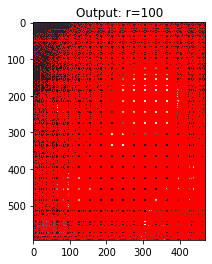

(211, 300)


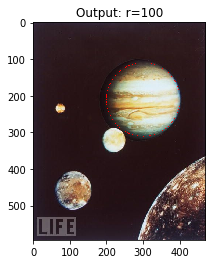

[(300, 211)]

In [28]:
imgJupiter = imread('./jupiter.jpg')
imgEgg = imread('./egg.jpg')
detectCircles(imgJupiter, 100, False)